In [1]:
import json
from modules.training_module import TrainingModule
from modules.model_evaluator import ModelEvaluator
from configs.base_config import TrainingModuleConfig
from configs.base_config import ForecastingModuleConfig
from modules.forecasting_module import ForecastingModule
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
sample_forecast_config = json.loads('{ "region_name": "bengaluru", "region_type": "district", "run_day": "3/22/20", "forecast_start_date": "4/1/20", "forecast_end_date": "4/20/20", "model_class": "SEIR", "model_parameters": {"MAPE":7.7, "infectious_period": 9.5412, "incubation_period": 6, "EbyCRatio": 0.69906, "IbyCRatio": 0.78, "r0": 2.4091, "LatentEbyCRatio": { "3/22/20": 0.69906, "4/1/20": 0.5781344247805147 }, "LatentIbyCRatio": { "3/22/20": 0.78, "4/1/20": 0.7781344247805147 } }, "forecast_variables": [ "confirmed", "recovered", "deceased" ] }')



In [74]:
evalConfig = ForecastingModuleConfig.parse_obj(sample_forecast_config)

In [75]:
evalConfig

ForecastingModuleConfig(region_name='bengaluru', region_type='district', model_class=<ModelClass.SEIR: 'SEIR'>, model_parameters={'MAPE': 9.546180761187406, 'infectious_period': 3.0075510221474486, 'incubation_period': 5, 'EbyCRatio': 0.8391673955347325, 'IbyCRatio': 0.8627192416226671, 'r0': 1.3014787171539706, 'LatentEbyCRatio': {'4/12/20': 0.8391673955347325, '4/27/20': 0.28141266638187024}, 'LatentIbyCRatio': {'4/12/20': 0.8627192416226671, '4/27/20': 0.18610391380056782}}, output_filepath=None, run_day='3/22/20', forecast_start_date='4/1/20', forecast_end_date='4/20/20', forecast_variables=[<ForecastVariable.confirmed: 'confirmed'>, <ForecastVariable.recovered: 'recovered'>, <ForecastVariable.deceased: 'deceased'>])

In [69]:
region_json = json.load(open('./model_params.json', 'r'))

In [79]:
region_json

{'regional_model_params': [{'region_name': 'bengaluru',
   'region_type': 'district',
   'model_name': 'SEIR',
   'model_parameters': {'EbyCRatio': 0.518754725345212,
    'IbyCRatio': 0.9253497785591837,
    'infectious_period': 1.17922843495018,
    'incubation_period': 5,
    'r0': 0.5970526229197348,
    'LatentEbyCRatio': {'4/15/20': 0.518754725345212,
     '4/27/20': 0.07717399825771437},
    'LatentIbyCRatio': {'4/15/20': 0.9253497785591837,
     '4/27/20': 0.02268673204433395},
    'MAPE': 12.963666426755314}},
  {'region_name': 'pune',
   'region_type': 'district',
   'model_name': 'SEIR',
   'model_parameters': {'EbyCRatio': 0.8391673955347325,
    'IbyCRatio': 0.8627192416226671,
    'infectious_period': 3.0075510221474486,
    'incubation_period': 5,
    'r0': 1.3014787171539706,
    'LatentEbyCRatio': {'4/12/20': 0.8391673955347325,
     '4/27/20': 0.28141266638187024},
    'LatentIbyCRatio': {'4/12/20': 0.8627192416226671,
     '4/27/20': 0.18610391380056782},
    'MAPE': 

t = 12.90


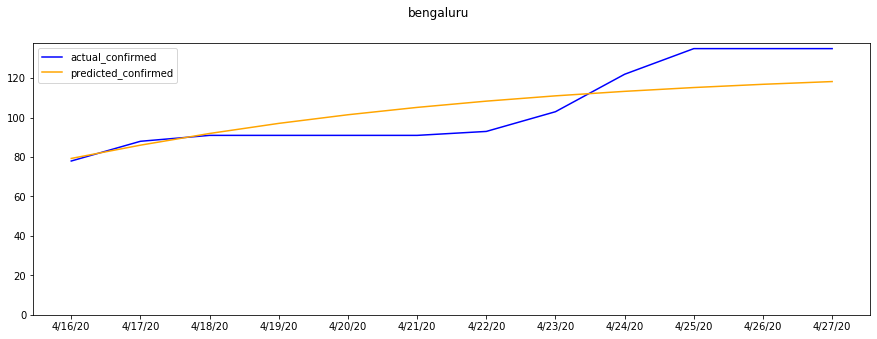

t = 15.90


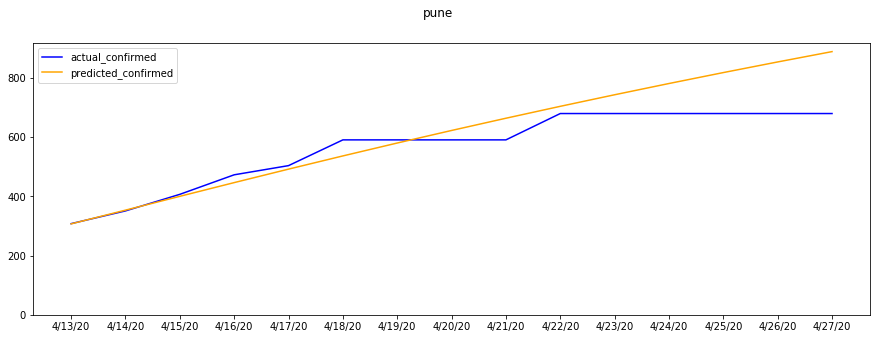

t = 11.90


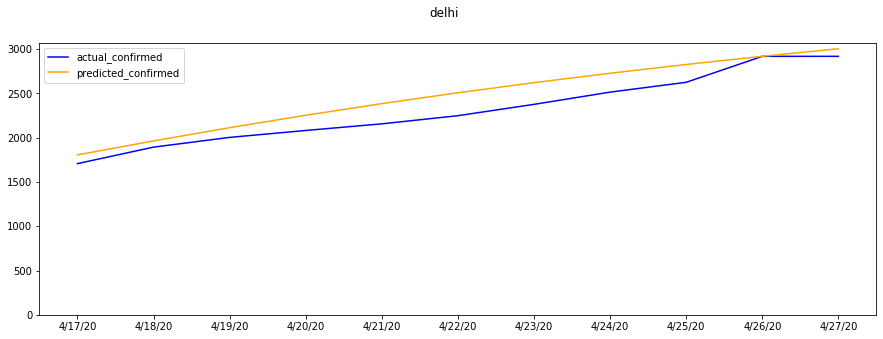

t = 11.90


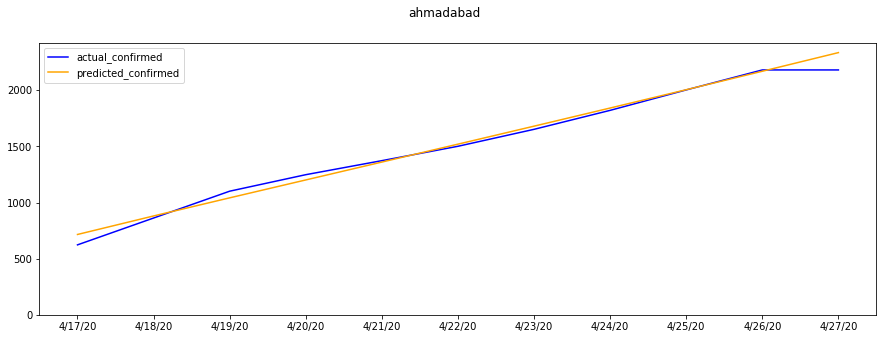

t = 11.90


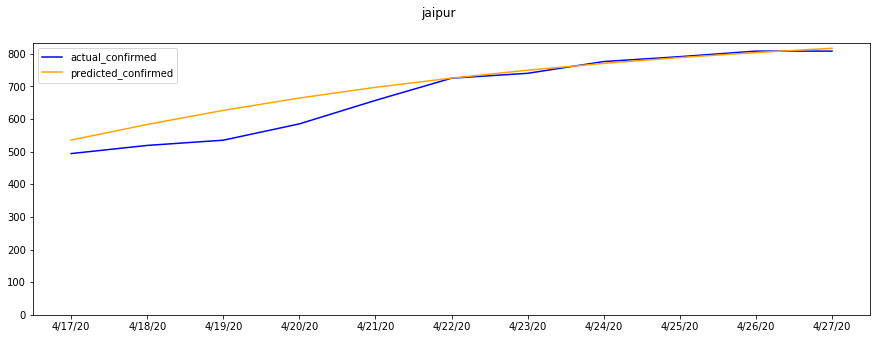

t = 15.90


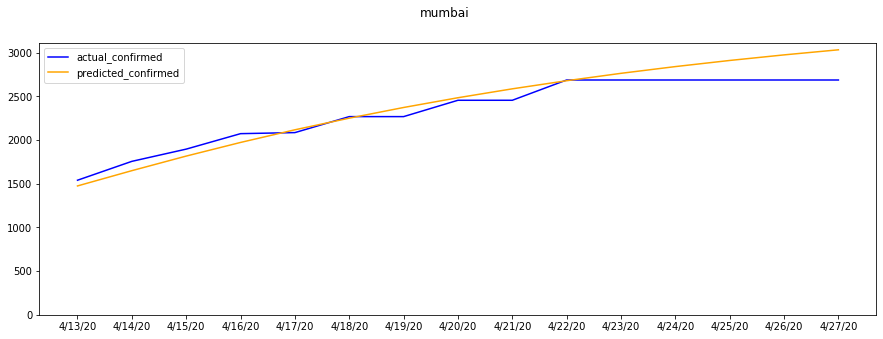

In [103]:
for i in range(len(region_json['regional_model_params'])):
    newConfig = region_json['regional_model_params'][i]
    evalConfig.region_name = newConfig['region_name']
    evalConfig.region_type = newConfig['region_type']
    evalConfig.model_parameters = newConfig['model_parameters']
    days = list(newConfig['model_parameters']['LatentEbyCRatio'].keys())
    days = sorted([datetime.strptime(day, "%m/%d/%y") for day in days])
    days = (days[0], days[0] + timedelta(days=1), days[1])
    days = [datetime.strftime(day, "%-m/%-d/%y") for day in days]
    evalConfig.run_day = days[0]
    evalConfig.forecast_start_date = days[1]
    evalConfig.forecast_end_date = days[2]
    pdjson1 = ForecastingModule.from_config(evalConfig)
    pdjson = pd.read_json(pdjson1)
    pdjson = pdjson.set_index('prediction_type')
    pdjson = pdjson.transpose()
    pdjson = pdjson.reset_index()
    pdjson = pdjson[4:]

    fig, ax = plt.subplots(figsize=(15, 5))
    fig.suptitle(newConfig['region_name'])
    ax.plot(pdjson['index'], pdjson['actual_confirmed'], color='blue', label="actual_confirmed")
    ax.plot(pdjson['index'], pdjson['confirmed_mean'], color='orange', label="predicted_confirmed")
    ax.set_ylim(ymin=0)
    ax.legend()
    
    plt.show()

